In [5]:
!pip install --upgrade --force-reinstall pandas==2.1.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
aiobotocore 2.25.2 requires botocore<1.40.71,>=1.40.46, but you have botocore 1.42.2 which is incompatible.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires python-dateutil==2.8.2, but you have python-dateutil 2.9.0.post0 which is incompatible.
conda-repo-cli 1.0.75 requires PyYAML==6.0.1, but you have pyyaml 6.0.3 which is incompatible.
conda-repo-cli 1.0.75 requires requests==2.31.0, but you have requests 2.32.5 which is incompatible.
feature-engine 1.9.3 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
streamlit 1.30.0 requires cachetools<6,>=4.0, but you have cachetools 6.2.2 which


  Using cached pandas-2.1.4-cp311-cp311-win_amd64.whl.metadata (18 kB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached pandas-2.1.4-cp311-cp311-win_amd64.whl (10.6 MB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata

In [6]:
import pandas as pd
import statsmodels as sm

print("pandas:", pd.__version__)
print("statsmodels:", sm.__version__)


pandas: 2.1.4
statsmodels: 0.14.5


In [8]:
import statsmodels
statsmodels.__version__


'0.14.5'

In [9]:
!pip install wordcloud


In [10]:
import numpy as np

import pandas as pd


import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest 

In [11]:
file_path=r"C:\Users\yagku\Downloads\SageMaker_Flight_Prediction-master\SageMaker_Flight_Prediction-master\Dataset\train.csv"
train=pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-04-09,Banglore,Delhi,06:00:00,08:45:00,165,0.0,No Info,7229
1,Jet Airways,2019-05-18,Delhi,Cochin,13:00:00,19:00:00,360,1.0,In-flight meal not included,12373
2,Air Asia,2019-04-15,Kolkata,Banglore,07:35:00,19:25:00,710,1.0,No Info,5192
3,Jet Airways,2019-05-09,Kolkata,Banglore,14:05:00,20:45:00,400,1.0,No Info,14781
4,Jet Airways,2019-06-03,Delhi,Cochin,22:50:00,19:00:00,1210,1.0,In-flight meal not included,10262
...,...,...,...,...,...,...,...,...,...,...
6395,Spicejet,2019-04-09,Banglore,Delhi,21:10:00,00:05:00,175,0.0,No Info,3971
6396,Jet Airways,2019-06-09,Delhi,Cochin,14:00:00,12:35:00,1355,1.0,In-flight meal not included,10262
6397,Indigo,2019-05-15,Banglore,Delhi,20:00:00,22:50:00,170,0.0,No Info,4823
6398,Goair,2019-04-24,Banglore,Delhi,20:55:00,23:40:00,165,0.0,No Info,3419


## 2. High Level Summery

In [12]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [13]:
train=train.assign(
    **{
        col:pd.to_datetime(train.loc[:,col],dayfirst=True,format="mixed")
        for col in ["date_of_journey","dep_time","arrival_time"]
    }
)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6400 non-null   object        
 1   date_of_journey  6400 non-null   datetime64[ns]
 2   source           6400 non-null   object        
 3   destination      6400 non-null   object        
 4   dep_time         6400 non-null   datetime64[ns]
 5   arrival_time     6400 non-null   datetime64[ns]
 6   duration         6400 non-null   int64         
 7   total_stops      6400 non-null   float64       
 8   additional_info  6400 non-null   object        
 9   price            6400 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 500.1+ KB


In [14]:
train.describe(include="number")

,duration,total_stops,price
count,6400.000000,6400.000000,6400.000000
mean,626.266406,0.800937,9060.259062
std,497.667675,0.660354,4692.203020
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5274.000000
50%,500.000000,1.000000,8266.000000
75%,910.000000,1.000000,12346.250000
max,2820.000000,3.000000,79512.000000


In [15]:
train.describe(include="O")

,airline,source,destination,additional_info
count,6400,6400,6400,6400
unique,9,5,6,8
top,Jet Airways,Delhi,Cochin,No Info
freq,2325,2650,2650,4993


In [16]:
(
    train.assign(total_stops=train.total_stops.astype(object)
     
    ).describe(include="O")   
)

,airline,source,destination,total_stops,additional_info
count,6400,6400,6400,6400.0,6400
unique,9,5,6,4.0,8
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2325,2650,2650,3428.0,4993


## 4. High Level analysis Of Missing Values

In [17]:
import importlib
import eda_helper_functions
importlib.reload(eda_helper_functions)

eda_helper_functions.missing_info(train)


,count,percentage


In [18]:
train=train.assign(
    total_stops=train.total_stops.fillna(0)
)
eda_helper_functions.missing_info(train)

,count,percentage


In [20]:
#[col for col in train.columns if train[col].isna().any()]

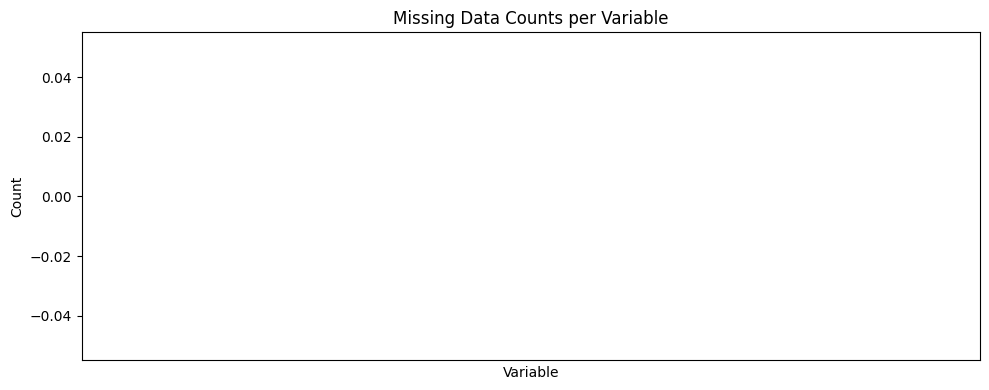

In [21]:
eda_helper_functions.plot_missing_info(train)

## 5. High Level of Outliers

In [22]:
forest=IsolationForest(n_estimators=6400,random_state=42)

In [23]:
 
(train.assign(outliers=IsolationForest(contamination=0.01).fit_predict(train.drop(columns="price").select_dtypes(include="number")))
     .query("outliers == -1")
     .duration
     .describe)

<bound method NDFrame.describe of 39      2565
376     1975
411     2345
463     2280
480     2300
        ... 
5989    2295
6158    1995
6163    1585
6188    2295
6352    2065
Name: duration, Length: 64, dtype: int64>

## 6. Pair plots

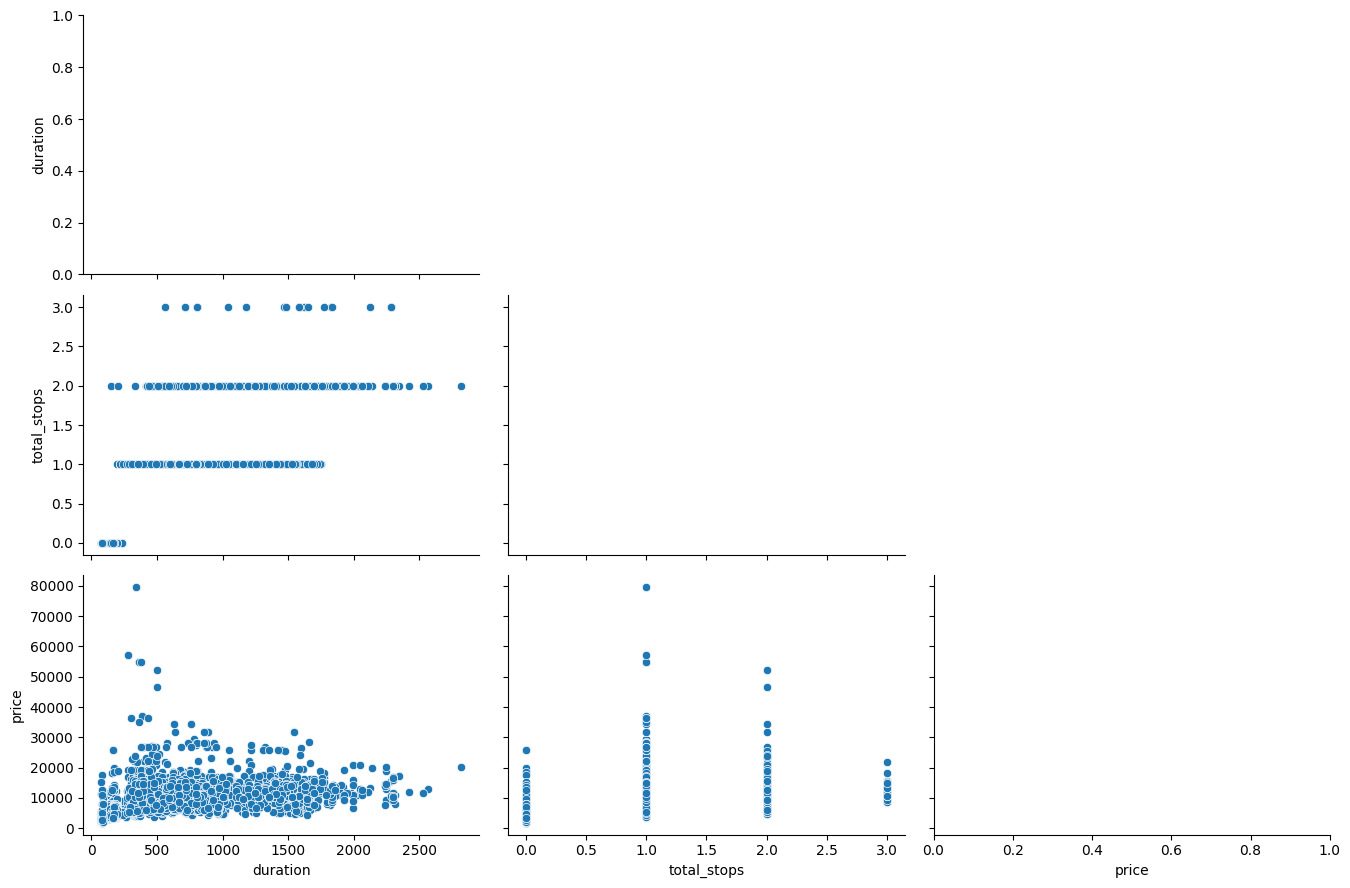

In [24]:
eda_helper_functions.pair_plots(train)

## 7. Correlation

c:\Users\yagku\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


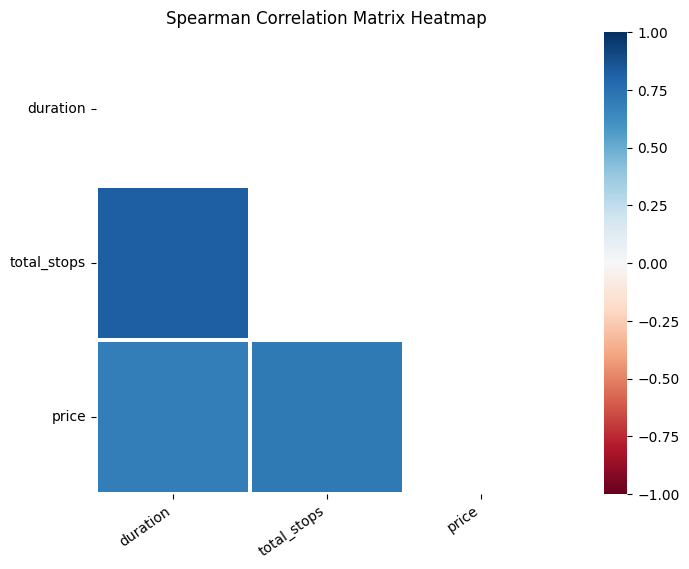

In [25]:
eda_helper_functions.correlation_heatmap(train)

In [26]:
train.corr(method="spearman",numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.822211,0.691623
total_stops,0.822211,1.000000,0.714620
price,0.691623,0.714620,1.000000


c:\Users\yagku\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


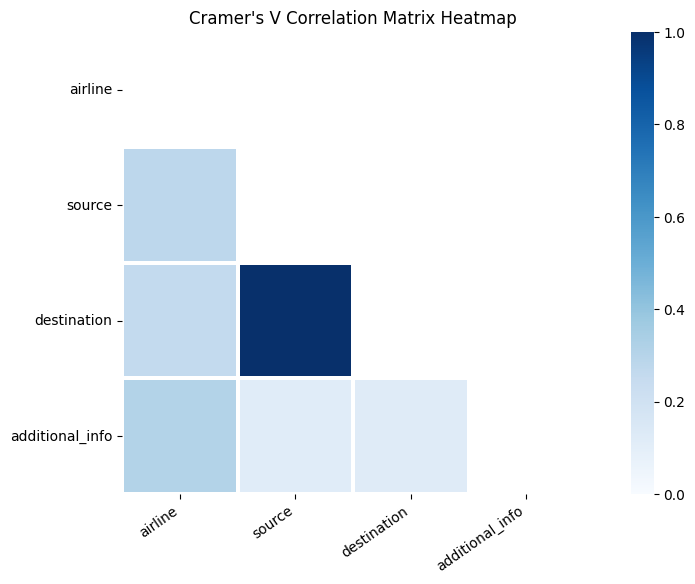

In [27]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed analysis of each feature 

In [28]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1. Airline

In [29]:
train.airline

0       Jet Airways
1       Jet Airways
2          Air Asia
3       Jet Airways
4       Jet Airways
           ...     
6395       Spicejet
6396    Jet Airways
6397         Indigo
6398          Goair
6399         Indigo
Name: airline, Length: 6400, dtype: object

In [30]:
eda_helper_functions.cat_summary(train,"airline")

0       Jet Airways
1       Jet Airways
2          Air Asia
3       Jet Airways
4       Jet Airways
           ...     
6395       Spicejet
6396    Jet Airways
6397         Indigo
6398          Goair
6399         Indigo
Name: airline, Length: 6400, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,400 / 6,400 rows


,
count,6400
unique,9
top,Jet Airways
freq,2325


,count,percentage
category,,
Jet Airways,2325,0.363281
Indigo,1258,0.196563
Air India,1023,0.159844
Multiple Carriers,712,0.111250
Spicejet,493,0.077031
Vistara,286,0.044687
Air Asia,184,0.028750
Goair,118,0.018437
Trujet,1,0.000156


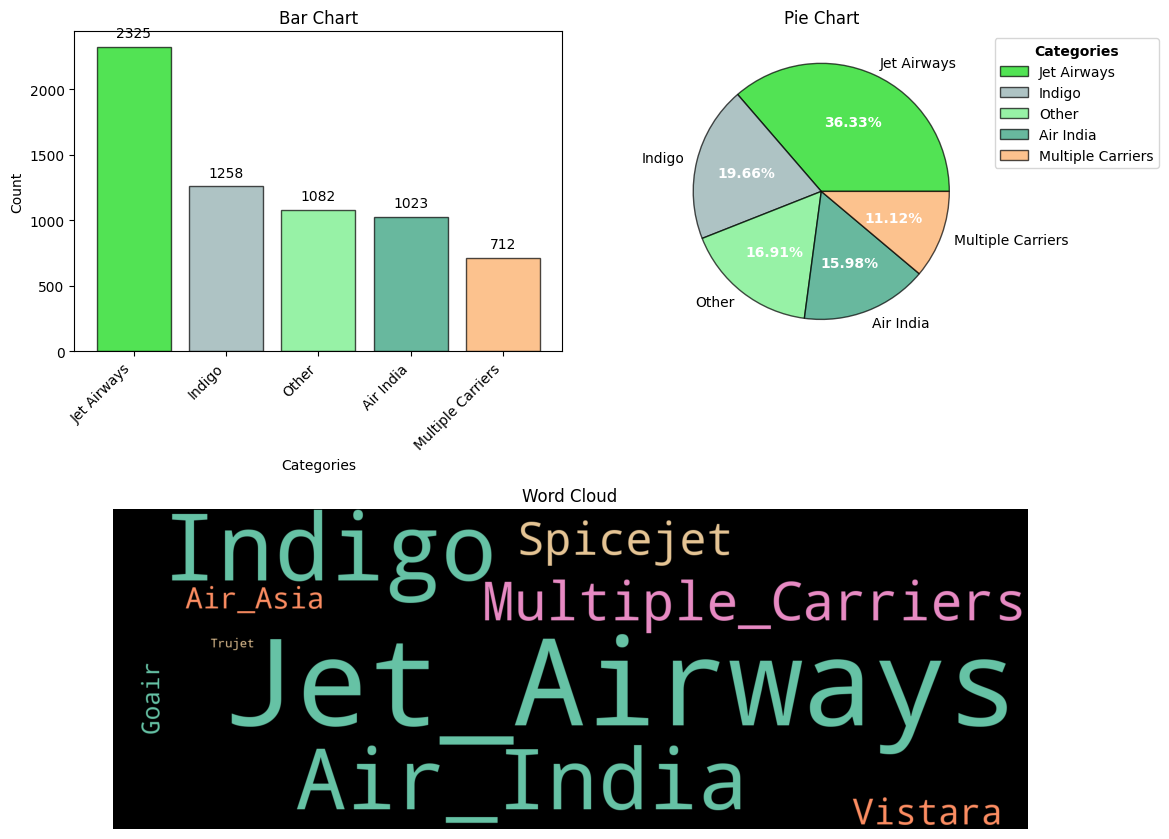

In [31]:
eda_helper_functions.cat_univar_plots(train,"airline",k=4)

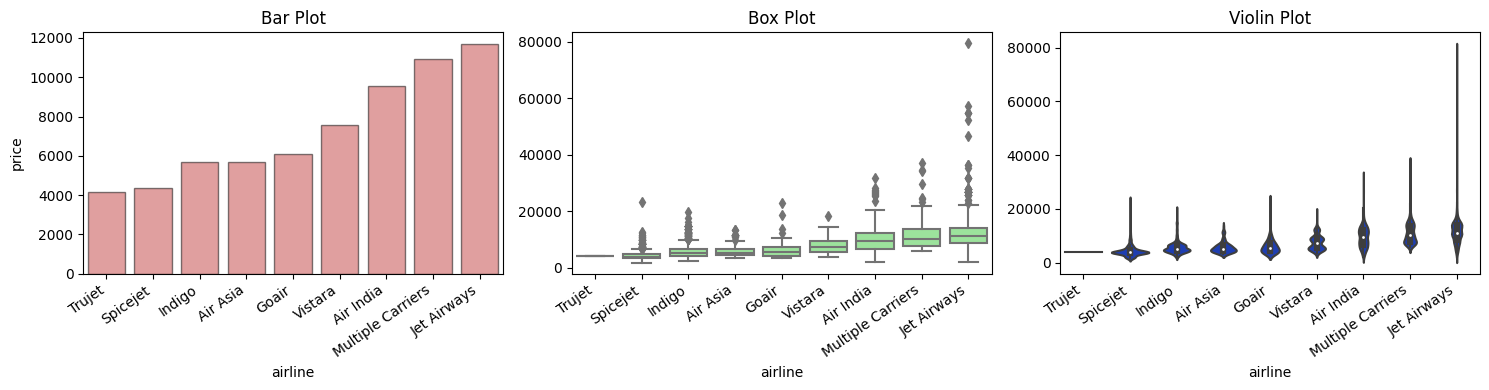

In [32]:
eda_helper_functions.num_cat_bivar_plots(data=train,num_var="price",cat_var="airline")

In [33]:
eda_helper_functions.num_cat_hyp_testing(train,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 415.96679878452824
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 2893.116758385903
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


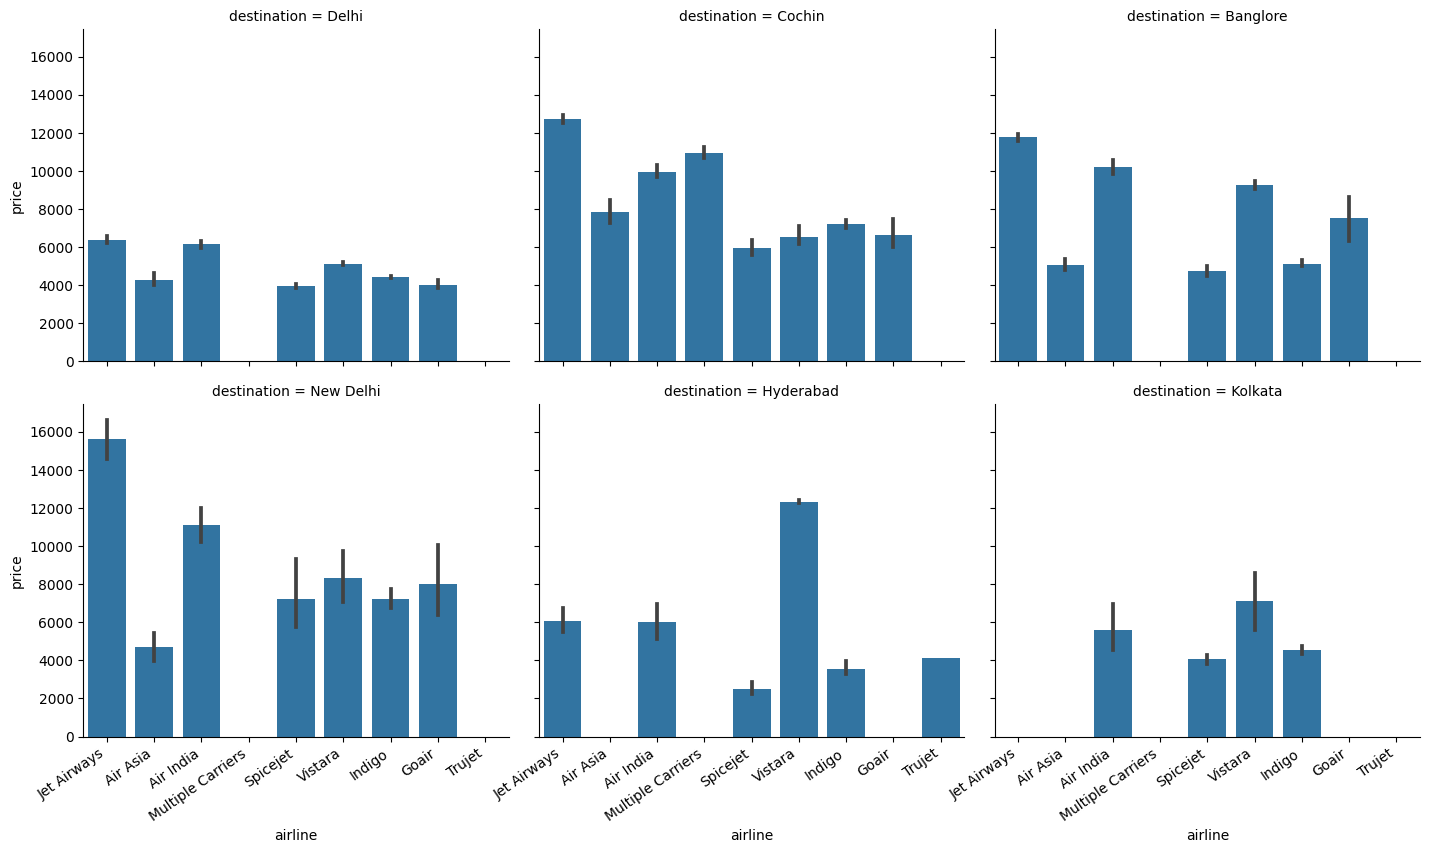

In [34]:
airline_grid=sns.FacetGrid(data=train,col="destination",col_wrap=3,height=4,aspect=1.2,sharey=True)
airline_grid.map(sns.barplot,"airline","price",order=train.airline.unique())
for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### 8.2 date_of_journey

In [35]:
train.airline

0       Jet Airways
1       Jet Airways
2          Air Asia
3       Jet Airways
4       Jet Airways
           ...     
6395       Spicejet
6396    Jet Airways
6397         Indigo
6398          Goair
6399         Indigo
Name: airline, Length: 6400, dtype: object

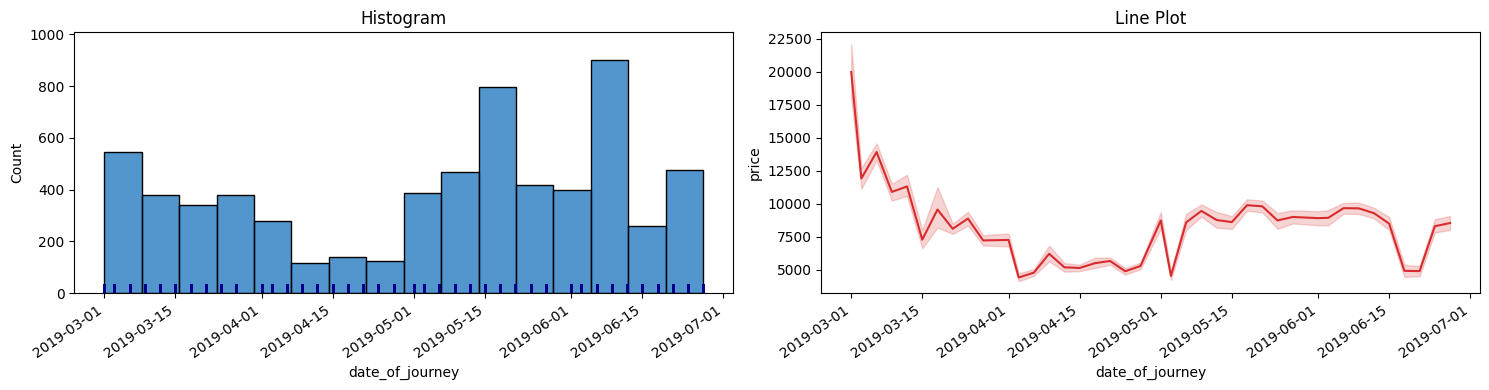

In [36]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var="date_of_journey",
    target="price"
)

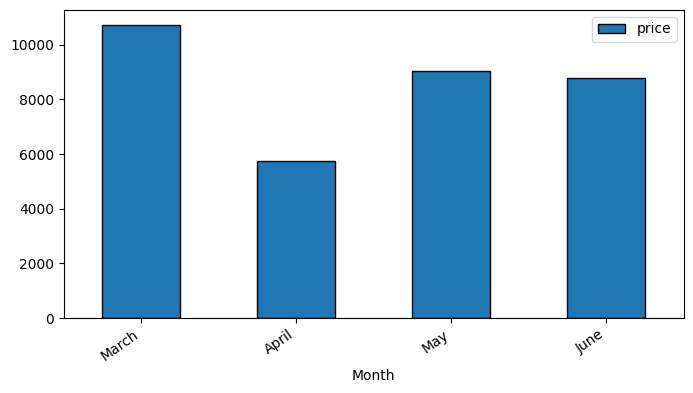

In [37]:
(
    train.groupby(pd.Grouper(key="date_of_journey",freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis("Month")
    .plot(kind="bar",
          figsize=(8,4)
        ,
        edgecolor="black"
          )
    
)
ax=plt.gca()
eda_helper_functions.rotate_xlabels(ax)

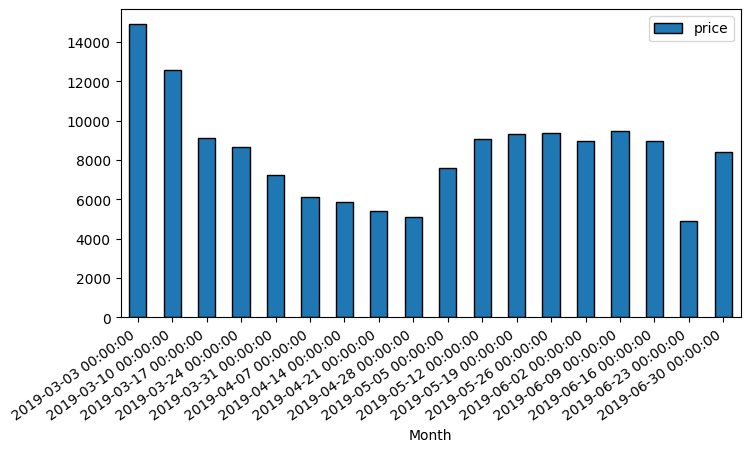

In [38]:
(
    train.groupby(pd.Grouper(key="date_of_journey",freq="w"))
    .price.mean()
    .to_frame()
    .rename_axis("Month")
    .plot(kind="bar",
          figsize=(8,4),
        edgecolor="black"
          )
    
)
ax=plt.gca()
eda_helper_functions.rotate_xlabels(ax)

<Axes: xlabel='Month'>

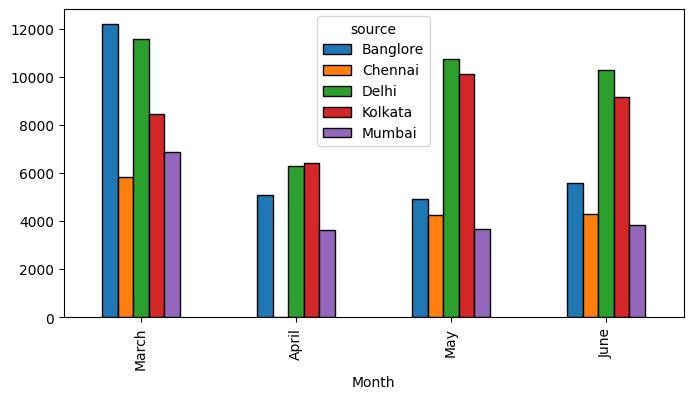

In [39]:
(
    train.groupby([pd.Grouper(key="date_of_journey",freq="M"),"source"])
    .price.mean()
    .unstack(fill_value=0)
     .set_axis(["March","April","May","June"],axis=0)
    .rename_axis("Month")
    .plot(kind="bar",
          figsize=(8,4)
        ,
        edgecolor="black"
          )
    
)

### 8.3 dep_time

In [40]:
train.dep_time

0      2025-12-05 06:00:00
1      2025-12-05 13:00:00
2      2025-12-05 07:35:00
3      2025-12-05 14:05:00
4      2025-12-05 22:50:00
               ...        
6395   2025-12-05 21:10:00
6396   2025-12-05 14:00:00
6397   2025-12-05 20:00:00
6398   2025-12-05 20:55:00
6399   2025-12-05 02:35:00
Name: dep_time, Length: 6400, dtype: datetime64[ns]

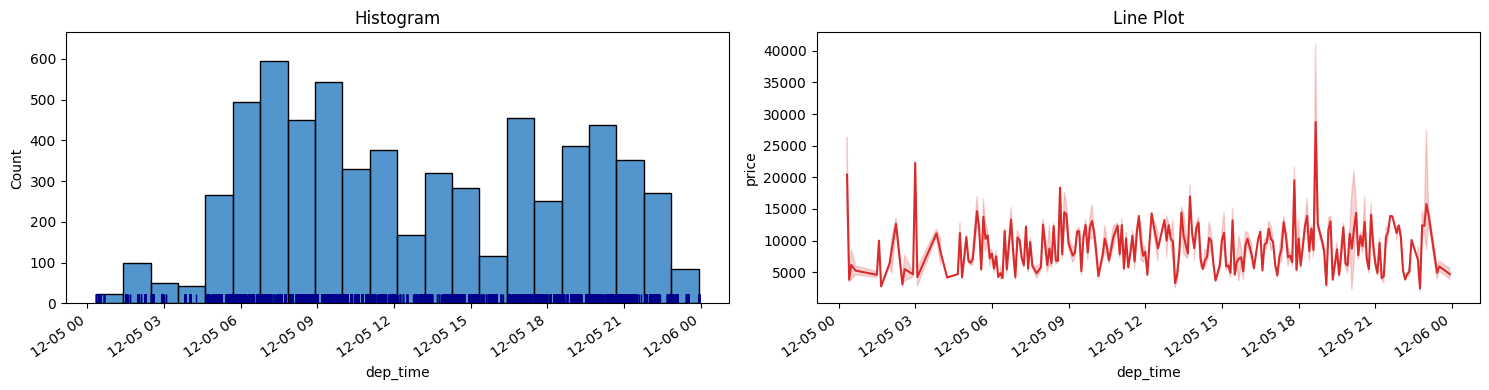

In [41]:
eda_helper_functions.dt_univar_plots(train,"dep_time","price")

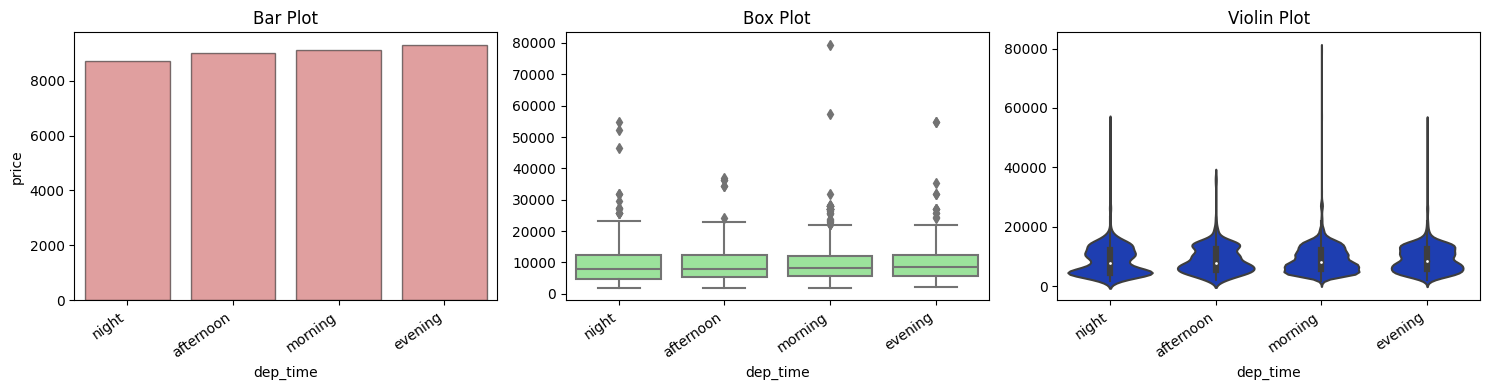

In [42]:
(
    train
    .assign(dep_time= lambda df_ :(
        np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                                df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                                df_.dep_time.dt.hour.between(16,20,inclusive="left")],
                               ["morning","afternoon","evening"],
                               default="night")
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price","dep_time")
    #.dep_time
    #.dt.hour
   # .pipe(
    #    lambda ser : pd.Series()
   # )
)


### 8.4 Duration

In [43]:
 train.duration

0        165
1        360
2        710
3        400
4       1210
        ... 
6395     175
6396    1355
6397     170
6398     165
6399     355
Name: duration, Length: 6400, dtype: int64

In [44]:
eda_helper_functions.num_summary(train,"duration")

0        165
1        360
2        710
3        400
4       1210
        ... 
6395     175
6396    1355
6397     170
6398     165
6399     355
Name: duration, Length: 6400, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,400 / 6,400 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,500.0
75,910.0
90,1430.0
95,1595.0
99,1840.0


,value
mean,626.266406
trimmed mean (5%),592.484375
trimmed mean (10%),563.894531
median,500.000000


,value
var,247673.114671
std,497.667675
IQR,740.000000
mad,330.000000
coef_variance,0.794658


,value
skewness,0.907461
kurtosis,-0.041445


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 3.437225525496683e-56
Test Statistic       : 0.8853115779876236
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 240.68201984615916
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


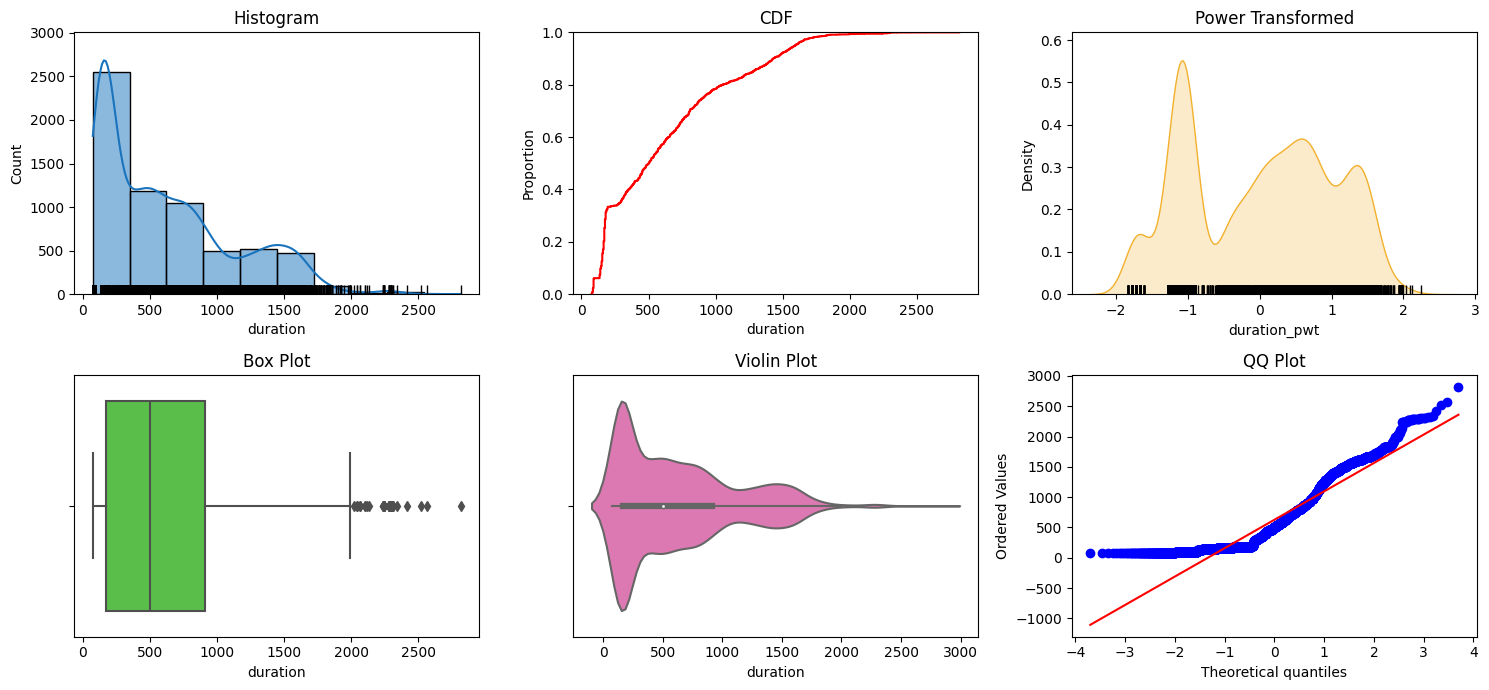

In [45]:
eda_helper_functions.num_univar_plots(train,"duration")

In [51]:
import eda_helper_functions
print(eda_helper_functions.__file__)


c:\Users\yagku\Downloads\SageMaker_Flight_Prediction-master\SageMaker_Flight_Prediction-master\Notebook\eda_helper_functions.py


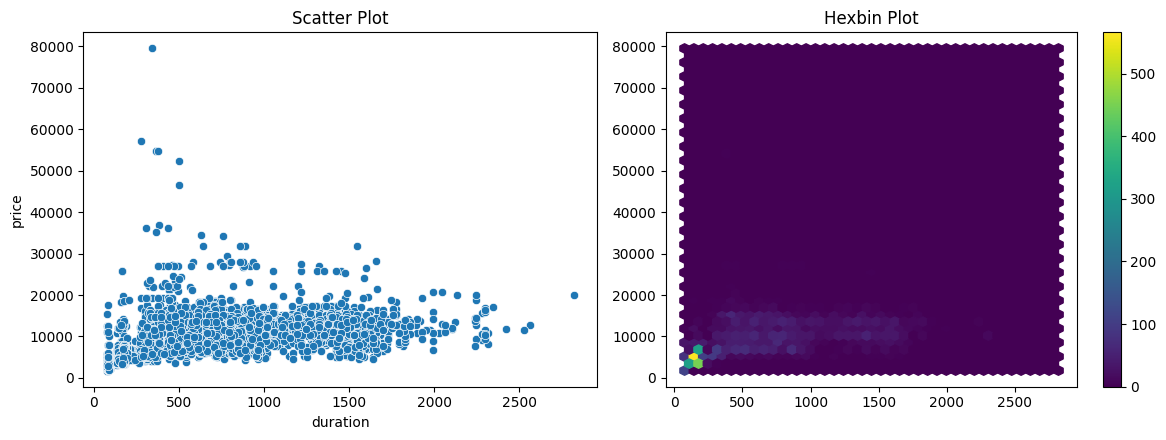

In [57]:
import importlib
import eda_helper_functions as eda
importlib.reload(eda)

eda.num_bivar_plots(train, "duration", "price")


In [58]:
eda_helper_functions.num_num_hyp_testing(train,"duration","price")


Pearson Test
Statistic: 0.4911203914164714, p = 0.0

Spearman Test
Statistic: 0.6916225009894666, p = 0.0


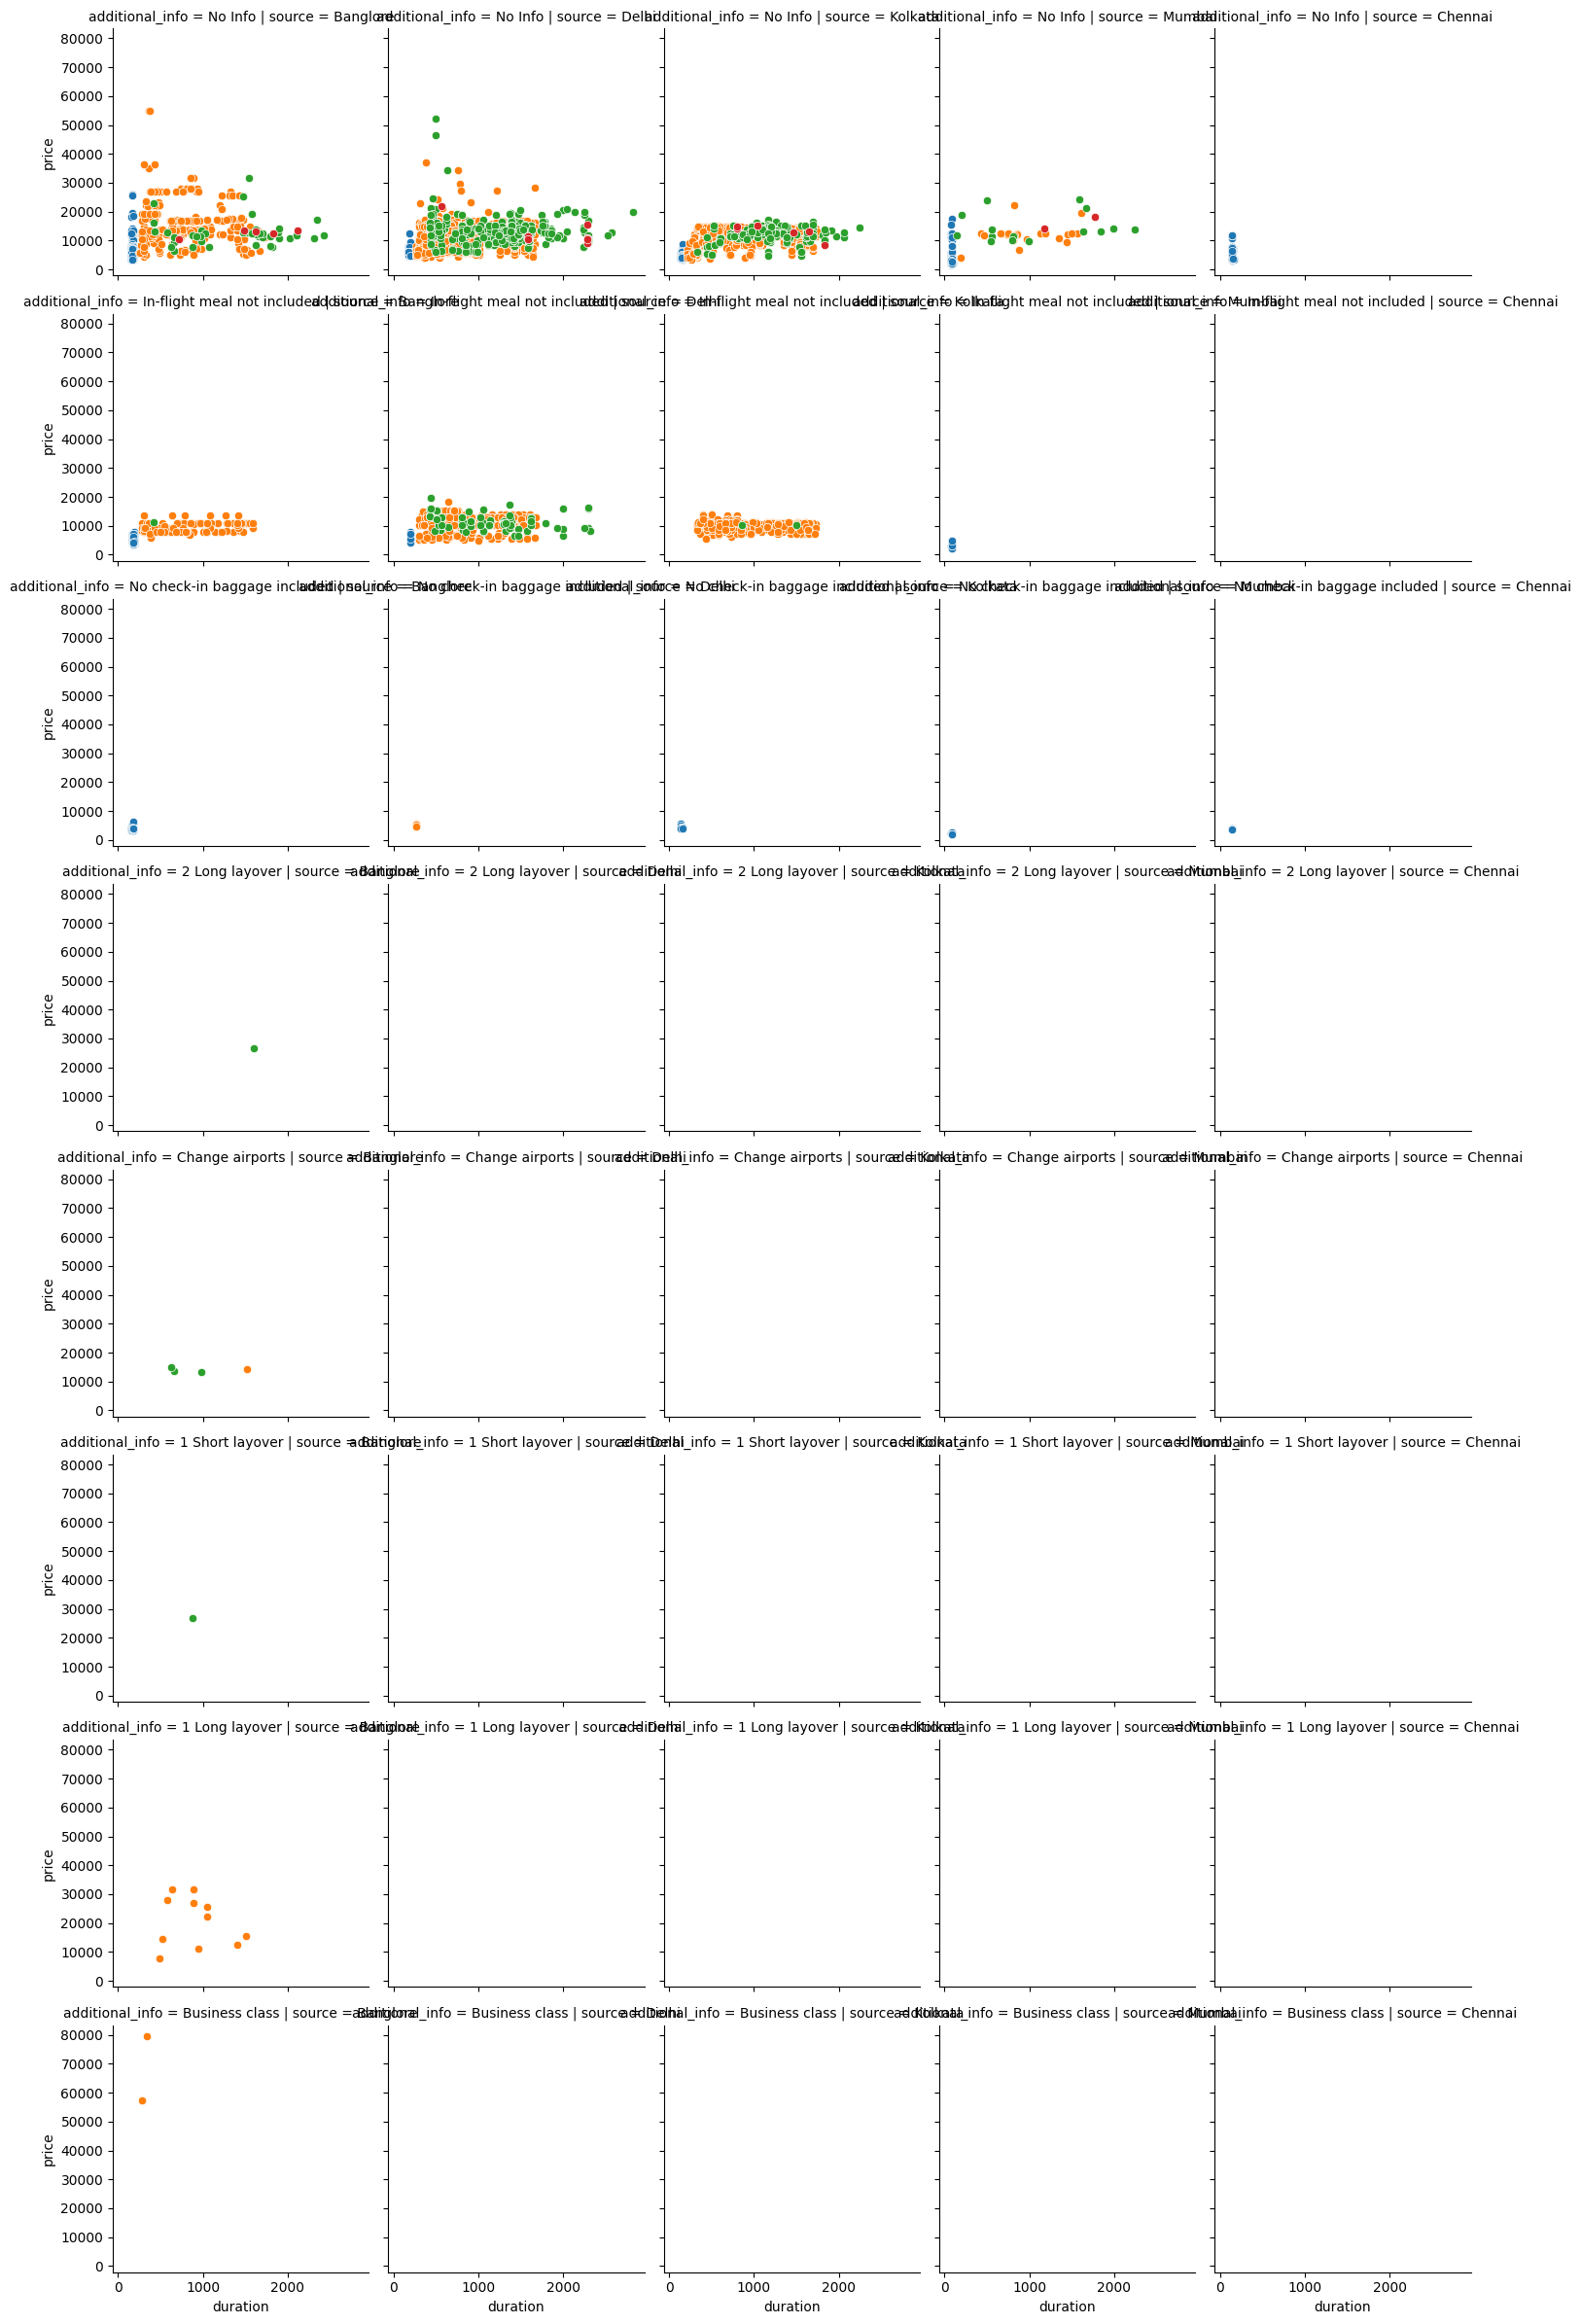

In [59]:
duration_grid= sns.FacetGrid(data=train,col="source",row="additional_info",hue="total_stops",sharex=True)
duration_grid.map(sns.scatterplot,"duration","price")

In [39]:
eda_helper_functions.get_iqr_outliers(train,"duration")

Lower Limit : -940.0
Upper Limit : 2020.0


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
2221,Jet Airways,2019-03-21,Delhi,Cochin,2024-06-29 18:25:00,2024-06-29 04:25:00,2040,2.0,No Info,12347
3048,Air India,2019-05-01,Kolkata,Banglore,2024-06-29 05:50:00,2024-06-29 16:15:00,2065,2.0,No Info,10991
5922,Jet Airways,2019-03-06,Delhi,Cochin,2024-06-29 17:55:00,2024-06-29 04:25:00,2070,2.0,No Info,17072
2126,Jet Airways,2019-03-06,Delhi,Cochin,2024-06-29 17:55:00,2024-06-29 04:25:00,2070,2.0,In-flight meal not included,15812
4988,Air India,2019-05-12,Kolkata,Banglore,2024-06-29 12:00:00,2024-06-29 23:15:00,2115,3.0,No Info,10991
5735,Air India,2019-03-24,Kolkata,Banglore,2024-06-29 12:00:00,2024-06-29 23:15:00,2115,3.0,No Info,14221
3309,Air India,2019-03-12,Banglore,New Delhi,2024-06-29 06:45:00,2024-06-29 18:05:00,2120,3.0,No Info,13387
1385,Air India,2019-03-06,Delhi,Cochin,2024-06-29 07:05:00,2024-06-29 19:15:00,2170,2.0,No Info,11552
1618,Air India,2019-03-09,Delhi,Cochin,2024-06-29 07:05:00,2024-06-29 19:15:00,2170,2.0,No Info,11762
831,Air India,2019-03-03,Delhi,Cochin,2024-06-29 07:05:00,2024-06-29 19:15:00,2170,2.0,No Info,11762


### 9. AutoMatated EDA